# Как устроен Python

In [1]:
import sys
import gc

In [16]:
s1 = "strin" + "g"
s2 = "string"
s1 is s2

True

## Указатели и значения

Указатель – адрес в памяти, где хранится значение.
Во многих ЯП можно решать, хочется передать данные по указателю или по значению.

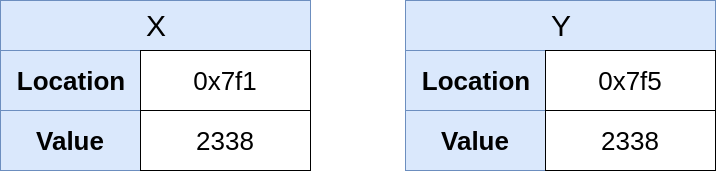

В Python’е указателей нет. Да и переменных, строго говоря, тоже. Есть имена.

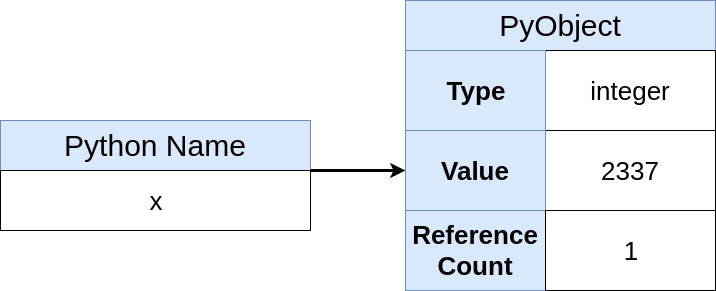

PyObject это сущность, которая хранит в себе:
- Тип данных
- Значение
- Кол-во ссылок на этот объект

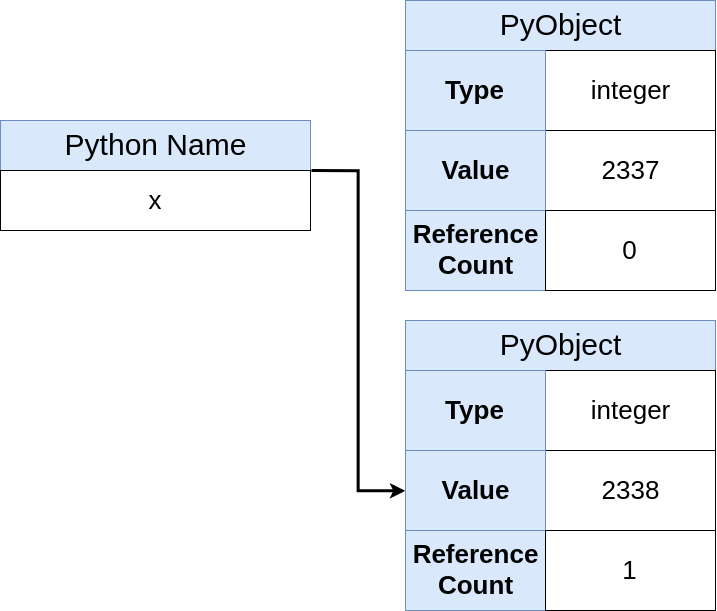

Создадим переменную и посмотрим на ее адрес и тип

In [2]:
x = 5
print(id(x))
print(type(x))

11642216
<class 'int'>


In [3]:
x = 6
print(id(x))
print(type(x))

11642248
<class 'int'>


Как можно сравнивать переменные:
- по адресу
- по значению

**is** сранивает адреса

In [4]:
x = 6
y = 6
print(x is y)

True


**==** сравнивает значения

In [5]:
print(x == y)

True


In [6]:
z = 100000
w = 100000
print(z is w)
print(z == w)

False
True


Почему так вышло?

## Interned objects

Некоторые объекты уже созданы заранее:
- Целые числа в диапазоне [-5; 256]
- Строки, содержащие только ASCII-буквы, цифры, знаки подчеркивания
- Строки должны быть созданы “изначально”
- Не длиннее 4096 символов
- Пустые кортежи

Сделаем функцию для сравнения адресов

In [7]:
def compare_addrs(a, b):
  print(a is b)

И проверим интернированные объекты

In [8]:
a = -6
b = -6
compare_addrs(a, b)

a = -5
b = -5
compare_addrs(a, b)

a = 256
b = 256
compare_addrs(a, b)

a = 257
b = 257
compare_addrs(a, b)

False
True
True
False


In [9]:
a = "qwertyuiopasdfghjklz"
b = "qwertyuiopasdfghjklz"
compare_addrs(a, b)

a = "a" * 4096
b = "a" * 4096
compare_addrs(a, b)

a = "a" * 4097
b = "a" * 4097
compare_addrs(a, b)

a = "qwertyuiopasdfghjklz!"
b = "qwertyuiopasdfghjklz!"
compare_addrs(a, b)

a = "Holberton"
b = "".join(["H", "o", "l", "b", "e", "r", "t", "o", "n"])
compare_addrs(a, b)

True
True
False
False
False


In [10]:
a = sys.intern("qwertyuiopasdfghjklz!")
b = sys.intern("qwertyuiopasdfghjklz!")
compare_addrs(a, b)

True


### Изменяемость

Некоторые типы неизменяемы, то есть операции над переменными ведут к созданию нового PyObject'а

In [11]:
a = "test!"
print(id(a))
a += "!"
print(id(a))

139993595726512
139993595595632


Ну а другие...

In [12]:
a = [1,2,3]
print(id(a))
a[0] = 0
print(id(a))

139993598438976
139993598438976


Но!

In [13]:
a = [1,2,3]
print(id(a[0]))
a[0] = 0
print(id(a[0]))

11642088
11642056


In [14]:
a = [1,2,3]
b = a

In [15]:
a[0] = 0

In [16]:
b

[0, 2, 3]

Проблема tuple'ов

In [18]:
a = (1,2)
a[0] = 0

TypeError: 'tuple' object does not support item assignment

In [19]:
a = (0, [1,2])
print(id(a))
a[1].append(3)
print(id(a))

139992916866816
139992916866816


Зачем в этом разбираться?

In [20]:
def incr(a):
  if type(a) == int:
    a += 1
  if type(a) == list:
    a.append(1)
  print(a)

a = 5
incr(a)
print(a)

6
5


In [21]:
a = [-1, 0]
incr(a)
print(a)

[-1, 0, 1]
[-1, 0, 1]


Как работать с изменяемыми типами (на примере массивов)

In [17]:
list1 = [1,2,3]
list2 = list1[:]
list3 = list(list1)
list4 = list1.copy()

compare_addrs(list1, list2)
compare_addrs(list1, list3)
compare_addrs(list1, list4)

False
False
False


В итоге имеем такую таблицу

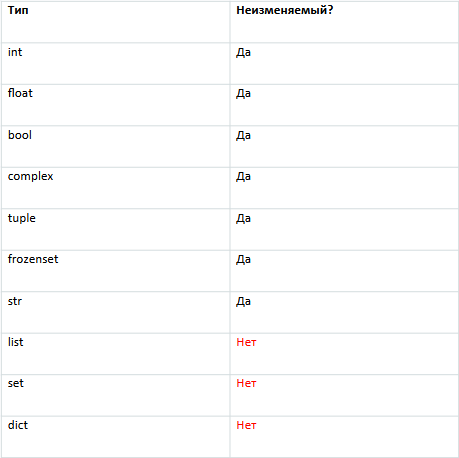

## Все есть класс?

Как можно понять, все переменные в Python’е является экземплярами классов.
И у чисел, строк, массивов – у всех есть свои методы.

In [22]:
a = 5
dir(a)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

Методы бывают трех типов:
- приватные
- защищенные
- публичные

Посмотрим поля?

In [23]:
a.__dict__

AttributeError: 'int' object has no attribute '__dict__'

Сделаем класс, чтобы посмотреть поля его экземпляра

In [24]:
class MyClass:
  integer = []

  def __init__(self):
    self.string = "my class"

In [25]:
c = MyClass()
print(c.__dict__)

{'string': 'my class'}


In [26]:
print(c.integer)

[]


А если посмотреть поля самого класса?

In [27]:
print(MyClass.__dict__)

{'__module__': '__main__', 'integer': [], '__init__': <function MyClass.__init__ at 0x7f52a4093560>, '__dict__': <attribute '__dict__' of 'MyClass' objects>, '__weakref__': <attribute '__weakref__' of 'MyClass' objects>, '__doc__': None}


Также методы классов можно разбить на:
- экземпляра
- статические
- классовые


In [28]:
class MyClass:
  integer = 0

  def __init__(self):
    self.string = "my class"

  def instance_method(self):
    print(self.string)
    print("I'm an instance")

  @staticmethod
  def static_method():
    print("i'm stuck")

  @classmethod
  def class_method(cls):
    print("our integer:", cls.integer)

Методы экземпляра просто используют поля экземпляра  
Статические методы как бы привязаны к классу, но вообще не используют его поля  
Методы класса привязаны именно к классу, так что и доступ имеют только к его полям

In [29]:
c1 = MyClass()

In [30]:
c1.instance_method()

my class
I'm an instance


In [31]:
c1.static_method()

i'm stuck


In [32]:
c1.class_method()

our integer: 0


При этом можно вызывать методы и не создавая экземпляры

In [33]:
MyClass.static_method()

i'm stuck


In [34]:
MyClass.class_method()

our integer: 0


In [35]:
MyClass.instance_method()

TypeError: MyClass.instance_method() missing 1 required positional argument: 'self'

## Видимость переменных

В зависимости от того, как и где определена переменная, определяется и область видимости этой переменной.
Правило поиска переменной по зонам:
- Local
- Enclosing
- Global
- Built-in

Локальная

In [37]:
def test():
  test_x = 1
  print(test_x2)

test()
print(test_x)

NameError: name 'test_x2' is not defined

Глобальная

In [38]:
def test():
  print(test_x)

test()

NameError: name 'test_x' is not defined

In [39]:
test_x = 0

In [40]:
test()

0


In [41]:
test_y = 0

def test():
    test_y += 1

print(test_y)
test()
print(test_y)

0


UnboundLocalError: cannot access local variable 'test_y' where it is not associated with a value

In [42]:
test_y = 0

def test():
    global test_y
    test_y += 1

print(test_y)
test()
print(test_y)

0
1


In [43]:
test_y = 0

def test(val):
    return val + 1

print(test_y)
test_y = test(test_y)
print(test_y)

0
1


Нелокальная

In [45]:
def test():
  test_z = 0
  def test_2():
    nonlocal test_z
    test_z += 1
  test_2()
  print(test_z)

test()

1


In [46]:
def test(a):
  test_w = 2
  def test_2():
    return a + test_w
  return test_2()

test(5)

7

In [47]:
def test_multi(a):
    def test_multi_internal(b):
        return b*a
    return test_multi_internal


test_multi_5 = test_multi(5)
print(test_multi_5(9))

45


Поищем переменную?

In [52]:
int = 0

def test():
  int = 1
  def test_2():
    int = 2
    print(int)
  test_2()

test()

2


Огласите весь список, пожалуйста!

In [53]:
def test():
  print(locals())
  test_list = 0
  print(locals())

  print(globals())

test()

{}
{'test_list': 0}
{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import sys\nimport gc', 'x = 5\nprint(id(x))\nprint(type(x))', 'x = 6\nprint(id(x))\nprint(type(x))', 'x = 6\ny = 6\nprint(x is y)', 'print(x == y)', 'z = 100000\nw = 100000\nprint(z is w)\nprint(z == w)', 'def compare_addrs(a, b):\n  print(a is b)', 'a = -6\nb = -6\ncompare_addrs(a, b)\n\na = -5\nb = -5\ncompare_addrs(a, b)\n\na = 256\nb = 256\ncompare_addrs(a, b)\n\na = 257\nb = 257\ncompare_addrs(a, b)', 'a = "qwertyuiopasdfghjklz"\nb = "qwertyuiopasdfghjklz"\ncompare_addrs(a, b)\n\na = "a" * 4096\nb = "a" * 4096\ncompare_addrs(a, b)\n\na = "a" * 4097\nb = "a" * 4097\ncompare_addrs(a, b)\n\na = "qwertyuiopasdfghjklz!"\nb = "qwertyuiopasdfghjklz!"\ncompare_addrs(a, b)\n\na = "Holberton"\nb = "".joi

## Работа с памятью

### Выделение памяти

По сути, есть 2 основных вида выделения:
- Выделения большого куска памяти (больше 512 байт)
- Выделение небольшого куска памяти

In [57]:
class List2():
  def __init__(self, val):
    self.val = val
    self.next = None
    self.prev = None

  def link(self, other):
    self.next = other
    other.prev = self

In [58]:
l1 = List2(0)
l2 = List2(1)
l3 = List2(2)

In [59]:
l1.link(l2)
l2.link(l3)

In [60]:
print(l1.val, l1.next.val, l1.next.next.val)

0 1 2


In [61]:
print(l3.val, l3.prev.val, l3.prev.prev.val)

2 1 0


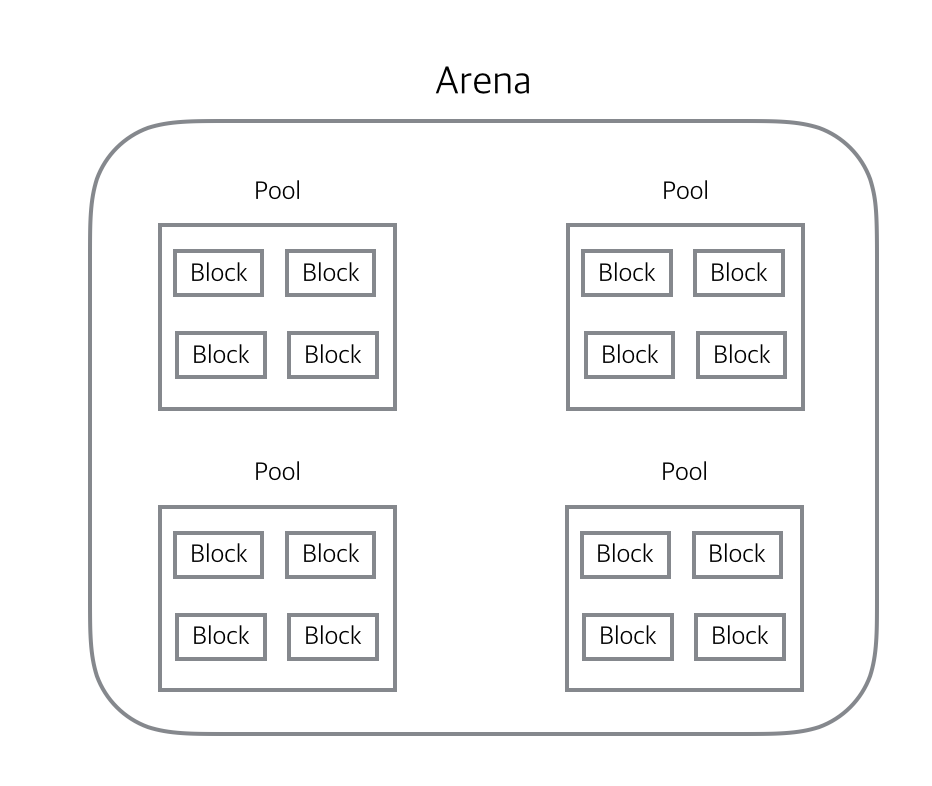

При выделение памяти на небольшие объекты сначала выбирается, из какой арены будет выделена память:
- Ищем подходящую арену / запрашиваем новую у ОС (подходящая = наиболее заполненная)
- Арены хранятся в двусвязном списке, от наиболее заполненной к наименее
- Полностью пустая арена возвращается в ОС

После этого выбирается пул:
- В пулах блоки одинаковых размеров, но при этом в арене сами пулы могут иметь разные размеры блоков
- Пулы могут быть пустыми, используемыми и полными
- При создании нового объекта сначала ищется используемый пул с подходящим размером блока, потом пустой, если нет, то запрашивается новая арена

После чего уже выбирается блок:
- Каждый блок имеет фиксированный размер, в рамках пула они одинаковы (8, 16, 32, …, 512 байт)
- Один блок = один объект
- Объект удален –> блок свободен

### Мусор

Всегда можно проверить, насколько много ест памяти наша программа

In [2]:
import psutil

In [3]:
def all_mem():
  mem = psutil.Process().memory_info().rss / (1024 * 1024)
  print(mem)

In [65]:
def small_object():
  a = [0] * 10
  all_mem()

def large_object():
  a = [0] * 100000000
  all_mem()

In [66]:
all_mem()
small_object()
all_mem()

309.68359375
309.68359375
309.68359375


In [67]:
all_mem()
large_object()
all_mem()

309.68359375
1072.55859375
309.65625


In [4]:
all_mem()

a = [0] * 1000000000
all_mem()

96.21875
7725.59375


In [5]:
del(a)
all_mem()

96.28125


Для быстрой и эффективной работы необходимо держать память в чистоте. Для этого есть 2 механизма:
- Счетчик ссылок
- Garbage collector

### Счетчик ссылок

Если на объект больше никто не ссылается, он не нужен. В таком случае его надо удалить.
Счетчик ссылок работает постоянно.

In [6]:
import sys

In [7]:
garbage_list = ["g", "a", "r", "b", "a", "g", "e"]
print(sys.getrefcount(garbage_list)) # создает референс

2


In [8]:
garbage_list2 = garbage_list
print(sys.getrefcount(garbage_list))

3


### GC

Однако счетчик ссылок не всегда может помочь. Бывает, что объект A ссылается на объект B, а тот ссылается на объект A. При этом из основного кода объекты недоступны.
Для того, чтобы находить и удалять такие объекты, работает GC.
Всего есть 3 поколения, переживаешь одно – попадаешь в следующее. Чем старше поколение, тем его реже проверяют.
GC запускается периодически.

In [9]:
import gc

In [10]:
gc.get_objects() # список всех, за кем следит

[('g*', str),
 (str, '(?s:g.*)\\Z', 0),
 re.compile(r'(?s:g.*)\Z', re.UNICODE),
 <function Pattern.match(string, pos=0, endpos=9223372036854775807)>,
 ['gspread_dataframe',
  'googlesearch',
  'geopy',
  'googleapiclient',
  'gdown',
  'glob',
  'google',
  'glob2',
  'geocoder',
  'google_auth_httplib2',
  'gradio_client',
  'gitdb',
  'grpc',
  'git',
  'gym',
  'geemap',
  'graphlib',
  'geographiclib',
  'getopt',
  'groovy',
  'gym_notices',
  'greenlet',
  'gc',
  'getpass',
  'gzip',
  'graphviz',
  'gin',
  'gspread',
  'gi',
  'grp',
  'google_crc32c',
  'geopandas',
  'genericpath',
  'gettext',
  'grpc_interceptor',
  'grpc_status',
  'google_auth_oauthlib',
  'gradio',
  'gast',
  'googledrivedownloader',
  'gymnasium',
  'gcsfs',
  'grpclib'],
 (9, 'import gc', 'import gc'),
 ['import gc\n'],
 (10, 1759426081.5796268, ['import gc\n'], '/tmp/ipython-input-2303536323.py'),
 <Future at 0x7b2d612cf710 state=finished returned NoneType>,
 <Condition(<unlocked _thread.RLock objec

In [11]:
gc.collect() # вызов сборщика мусора

93

In [12]:
gc.get_stats() # статистика сбора: 3 поколения, по каждому - сколько раз собирали, сколько собрали, сколько поместили в мусор

[{'collections': 251, 'collected': 6862, 'uncollectable': 0},
 {'collections': 22, 'collected': 1040, 'uncollectable': 0},
 {'collections': 3, 'collected': 143, 'uncollectable': 0}]

In [ ]:
gc.disable() # отключение и включение автоматической сборки
gc.enable()
gc.get_threshold() # пороговые значения того, сколько раз надо проверить предыдущее поколение, чтобы проверить следующее
gc.set_threshold()

In [13]:
print(gc.get_referents(garbage_list)) # на кого мы ссылаемся
print(gc.get_referents(garbage_list2))
# print(gc.get_referents(c1))

['e', 'g', 'a', 'b', 'r', 'a', 'g']
['e', 'g', 'a', 'b', 'r', 'a', 'g']


In [14]:
garbage_integer = 1
print(gc.is_tracked(garbage_integer))
garbage_tuple = (0, 1)
print(gc.is_tracked(garbage_tuple))
garbage_dict = {1:1, 2:2}
print(gc.is_tracked(garbage_dict))
garbage_dict_2 = {1:[1], 2:[2]}
print(gc.is_tracked(garbage_dict_2))

False
True
False
True


# Мини домашка

## Задание 1

Напишите функцию, которая будет для любых (не только интернированных) одинаковых строк возвращать результат сравнения адресов как True, в противном случае - False

In [ ]:
def compare_addr(val1, val2):
  assert type(val1) == str and type(val2) == str

  # ваш код

  return val1 is val2

In [ ]:
tests = [
    ("a","a", True),
    ("a","b", False),
    ("a a", "a a", True),
    ("a a", "a b", False)
    ]
for t in tests:
  a, b, result = t
  assert compare_addr(a,b) == result

## Задание 2

Напишите функцию, что будет на вход принимать 2 переменных; на выходе она:
- возвращает их разность, если их тип одинаковый, а метод вычисления разности у этого типа существует
- возвращает их сумму, если их тип одинаковый, метод вычисления разности не существует, но метод вычисления суммы существует
- none, иначе

Подсказка: метод вычисления разности это '\_\___sub__\_\_', суммы это '\_\___add\_\___'

In [ ]:
def substract_or_add(val1, val2):
  # ваш код

  return None

In [ ]:
assert substract_or_add('a', 'b') == 'ab'
assert substract_or_add(0, 1) == -1
assert substract_or_add([1,2], [3,4]) == [1,2,3,4]
assert substract_or_add(False, True) == -1
assert substract_or_add([1,2], [3,4]) == [1,2,3,4]
assert substract_or_add(set([1,2]), set([1,4])) == set([2])
assert substract_or_add(None, None) == None

## Задание 3

На лекции был пример функции, возвращающей функцию для умножения числа  
Давайте сделаем что-нибудь посложнее:
- функция будет принимать число, возвращать другую функцию, принимающую число
- внутрення функция будет умножать первое число на второе в том случае, если НЕ существует в глобальной области переменная multiplier (то есть a * b); в противном случае умножение будет на нее (то есть multiplier * b)


In [ ]:
def multi(a):
  def multi_internal(b):
    # ваш код
    pass
  return multi_internal

In [ ]:
# подчищаем переменную из глобальной области, не обращайте внимание
try:
  del(multiplier)
except NameError:
  pass


assert multi(5)(4) == 20
multiplier = 10
assert multi(5)(4) == 40

## Задание 4

Может ли быть такое, что is вернет True, а == вернет False?

## Задание 5

Как мы уже смотрели, для каких-то данных есть interned objects, для кого-то их нет

In [ ]:
def compare_addrs(a, b):
  print(a is b)

a = -6
b = -6
compare_addrs(a, b)

a = "bad string"
b = "bad string"
compare_addrs(a, b)

Почему же в случае, когда неинтернированные объекты лежат в листе, их адреса совпадают?

In [ ]:
bad_vals = [-6, "bad string"]
for val in bad_vals:
  a = val
  b = val
  compare_addrs(a, b)

bad_vals = [-6, "bad string"]
for i in range(0, len(bad_vals)):
  a = bad_vals[i]
  b = bad_vals[i]
  compare_addrs(a, b)

## Задание 6

Стоит быть осторожными с изменяемыми типами данных

Почему словили ошибку при попытке пройти по массиву и удалить из него лишний элемент?

In [ ]:
array_to_cut = [1,1,2,3,4,3,3,5]
for i in range(0,len(array_to_cut)):
  if array_to_cut[i] == 3:
    array_to_cut.pop(i)
print(array_to_cut)

Почему при изменении элемента ошибок не возникает?

In [ ]:
array_to_change = [1,2,3,4,5]
for i in range(0,len(array_to_change)):
  if array_to_change[i] == 3:
    array_to_change[i+1] -=1

print(array_to_change)